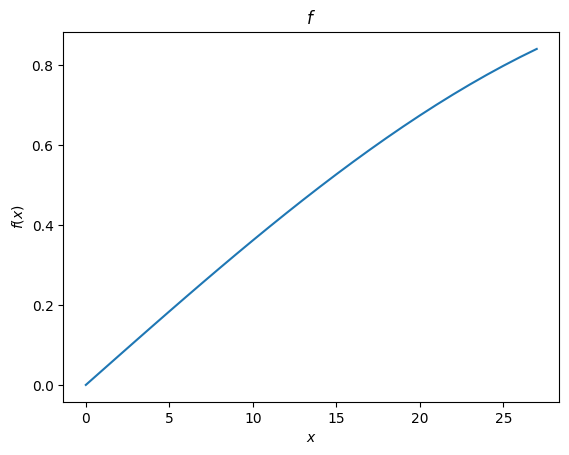

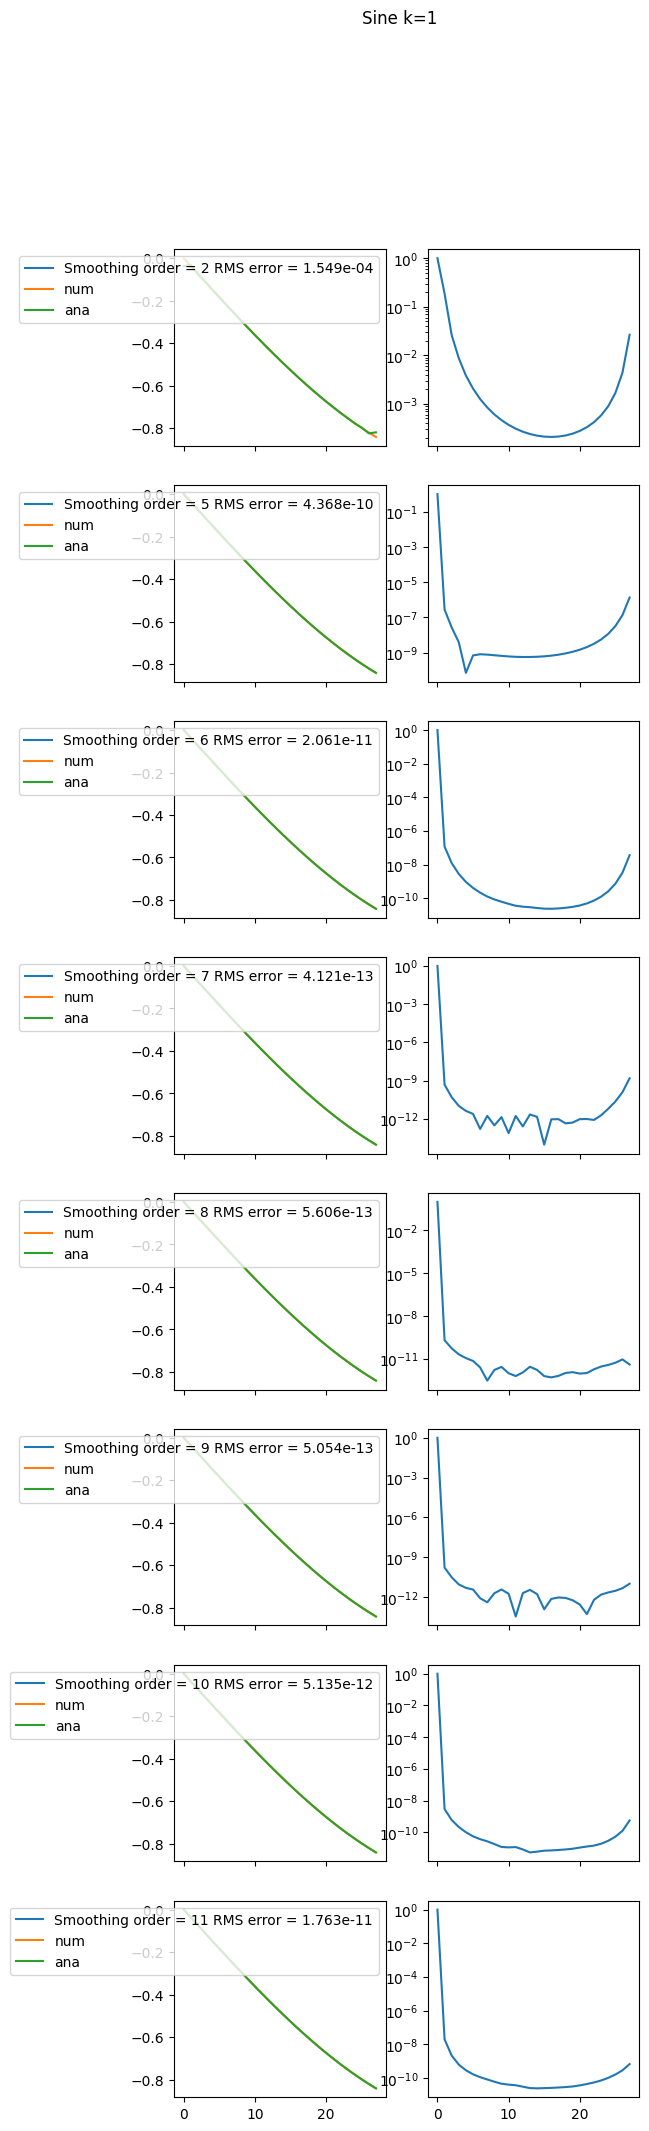

In [11]:
import spectral_derivative as sd
import numpy as np 
import matplotlib.pyplot as plt

L                 = 1
N                 = 28
dx                = L/(N - 1)
x                 = np.arange(0, N) * dx
ghostBoundary     = 6
fdl               = 0
fdr               = 0
BC                = sd.PERIODIC
mode              = sd.M_NTH_ORDER
derivativeMode    = sd.ONE_SIDED

name = "Sine k=1 one-sided"
def func(x, k=1):
    return np.sin(x*k) 

def ddfunc(x, k = 1):
    return -k**2*np.sin(x*k)

f      =   func(x)
ddfnum = ddfunc(x)

plt.title(r"$f$")
plt.plot(f)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.show()

orders = [2, 5, 6, 7, 8, 9, 10, 11]

fig, axs = plt.subplots(nrows=len(orders), ncols=2, sharex=True, figsize=(6, len(orders) * 3)) 
fig.suptitle(name)
for i, smoothingOrder in enumerate(orders):
    #Create shift function that such that f - B fulfills either Dirichlet, Neumann or periodic boundary conditions depending on mode
    B = sd.getShiftFunction(x, f, mode, derivativeMode, lb = fdl, rb = fdr, N = smoothingOrder, debug=False)

    #Boundary for finite difference stencil
    lind =          fdl
    rind = len(x) - fdr 

    #Subtract linear shift function to enforce Dirichlet BC when computing second derivative
    homf            = f[ lind : rind ] - B[0]
    homf            = np.pad(homf, (0, 1), mode="constant")
    p, ind1, ind2   = sd.selectBC       (homf, BC)
    ddf, k          = sd.laplacianDtt1D (p, dx, BC, debug= False)
    ddfana          = ddf.real + B[1]


    axs[i, 0].plot([], label= f"Smoothing order = {smoothingOrder} RMS error = {np.mean(np.abs(ddfnum - ddfana)[ghostBoundary:-ghostBoundary]):3.3e}")
    axs[i, 0].plot(ddfnum, label="num")
    axs[i, 0].plot(ddfana, label="ana")
    axs[i, 0].legend()
    axs[i, 1].set_yscale("log")
    axs[i, 1].plot(np.abs((ddfnum-ddfana)/ddfana), label="num")
plt.show()